#### **First Step**: Consulting data to the Database

Task:

- Establish connection to the database
- Load data into a dataframe as `df`


In [182]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [183]:
from connections.db import DB

db = DB()

In [184]:
# Fetch the data from the database as a dataframe
df = db.fetch_as_dataframe('../sql/queries/004_get_raw_data.sql')

2024-08-24 20:35:24,890 - ✔ Connected to database
2024-08-24 20:36:31,085 - ✔ Data loaded into DataFrame
2024-08-24 20:36:31,253 - ✔ Cursor closed
2024-08-24 20:36:31,253 - ✔ Connection closed


---

#### **Second Step**: Understanding what data we have:

Task:

- Understand the dataframe structure.
- Evaluate the data quality of the dataframe.
- Explore the category columns.
- Explore data distribution.
- Explore the temporal range of the data

In [185]:
# What do the first dataframe records look like?
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [186]:
# What is the size of the dataframe?
df.shape

(1296675, 24)

In [187]:
# What columns does the dataframe have?
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [188]:
# What type of data is each column?
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [189]:
# How many unique values does each column have?
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
merch_zipcode              28336
dtype: int64

In [190]:
# Are there any missing values?
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

----

#### **Third Step**: Analyze in depth the columns and their characteristics

Task:

- Identify which columns are not relevant.
- Identify which columns require cleaning.
- Identify what characteristics each column has.
- Identify what type of analysis can be performed with the data we have.

- **Column `Unnamed: 0`**

In [191]:
# Is the column 'Unnamed: 0' a candidate for id?

# 1. Check for uniqueness
is_unique = df['Unnamed: 0'].is_unique
print("Is it unique?", is_unique)

# 2. Check for null values
has_nulls = df['Unnamed: 0'].isnull().any()
print("Does it have null values?", has_nulls)

# 3. Check if it is autoincremental
is_autoincremental = (df['Unnamed: 0'].diff().dropna() == 1).all()
print("Is it autoincremental?", is_autoincremental)

# 4. Identify missing numbers (if not autoincremental)
if not is_autoincremental:
    expected_range = set(range(df['Unnamed: 0'].min(), df['Unnamed: 0'].max() + 1))
    missing_numbers = expected_range - set(df['Unnamed: 0'])
    print("Missing numbers:", sorted(missing_numbers))

Is it unique? True
Does it have null values? False
Is it autoincremental? False
Missing numbers: []


> The column 'Unnamed: 0' is the best candidate for conversion to an id.

---

- **Column `trans_date_trans_time`**

In [195]:
# How many years of data do we have?
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['year_of_trans'] = df['trans_date_trans_time'].dt.year

print(f'The dataset has a time range of {df['year_of_trans'].max() - df['year_of_trans'].min()} years.')

The dataset has a time range of 1 years.


---

- **Categorical columns: `category`,`gender`,`state`,`job`,`is_fraud`**

<Axes: title={'center': 'Transaction Count by Category'}, xlabel='Category', ylabel='Count'>

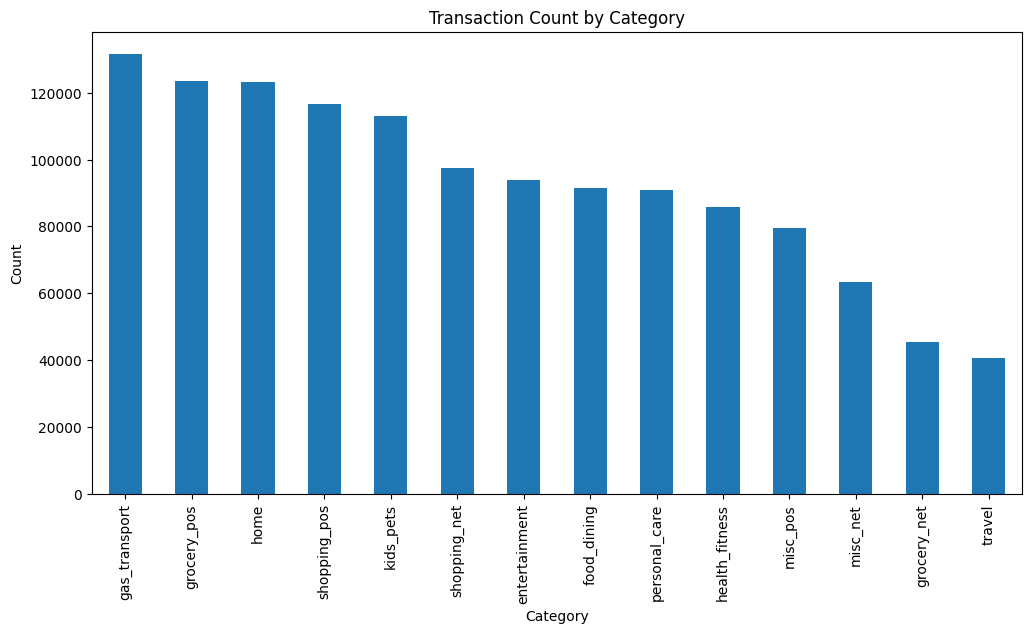

In [196]:
df['category'].value_counts().plot(kind='bar', title='Transaction Count by Category', xlabel='Category', ylabel='Count', figsize=(12, 6))

---

<Axes: title={'center': 'Transaction Percentage by Gender'}>

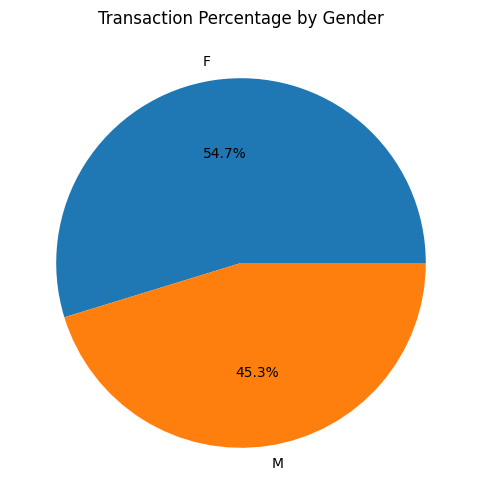

In [197]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Transaction Percentage by Gender', xlabel='', ylabel='', figsize=(12, 6))

---

<Axes: title={'center': 'Transaction Count by State'}, xlabel='State', ylabel='Count'>

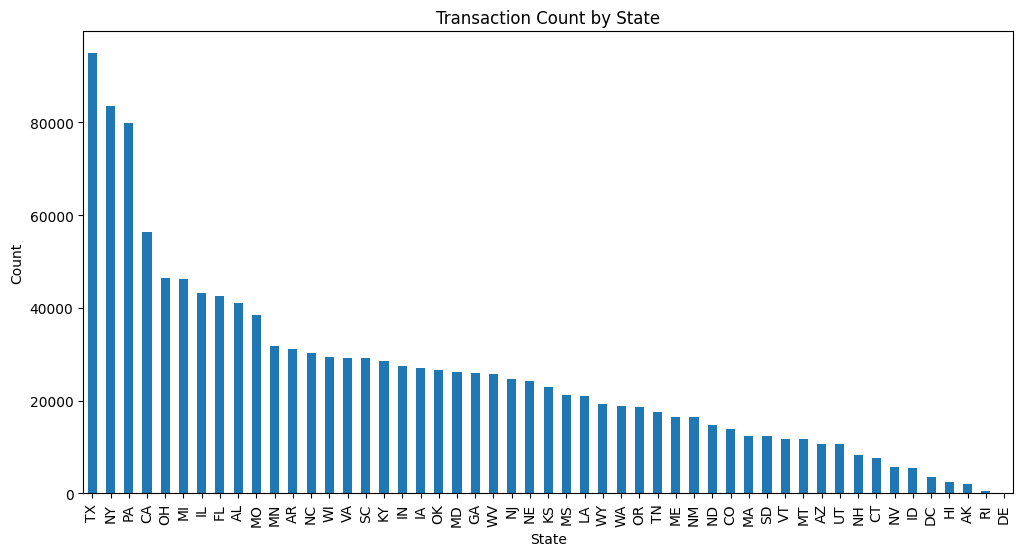

In [198]:
df['state'].value_counts().plot(kind='bar', title='Transaction Count by State', xlabel='State', ylabel='Count', figsize=(12, 6))

---

In [199]:
print("\nhead:")
print(df['job'].value_counts().head(10))
print("\ntail:")
print(df['job'].value_counts().tail(10))


head:
job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
Designer, ceramics/pottery    8225
Systems developer             7700
IT trainer                    7679
Financial adviser             7659
Environmental consultant      7547
Name: count, dtype: int64

tail:
job
Accountant, chartered             11
Industrial buyer                  10
Forest/woodland manager            9
Broadcast journalist               9
Armed forces technical officer     8
Veterinary surgeon                 8
Information officer                8
Contracting civil engineer         7
Ship broker                        7
Warehouse manager                  7
Name: count, dtype: int64


---

<Axes: title={'center': 'Transaction Percentage by is_fraud'}>

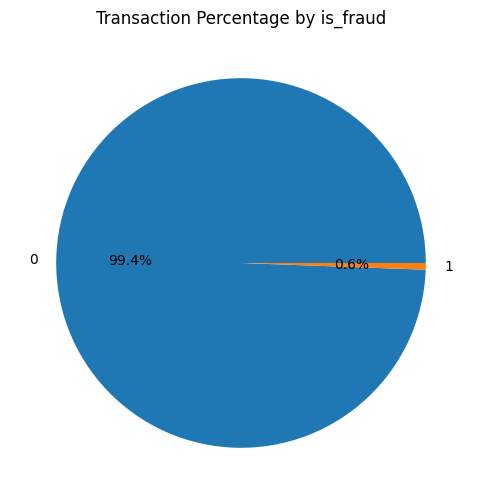

In [200]:
df['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Transaction Percentage by is_fraud', xlabel='', ylabel='', figsize=(12, 6))

In [201]:
# How many fraudulent and non-fraudulent transactions do we have?
print("Number of fraudulent transactions:", df[df['is_fraud']==1].value_counts().sum())
print("Number of non-fraudulent transactions:", df[df['is_fraud']==0].value_counts().sum())

Number of fraudulent transactions: 6363
Number of non-fraudulent transactions: 1094339


---

In [202]:
# What is the average amount for each type of transaction?
df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

<Axes: title={'center': 'Histogram of City Population'}, xlabel='City Population', ylabel='Frequency'>

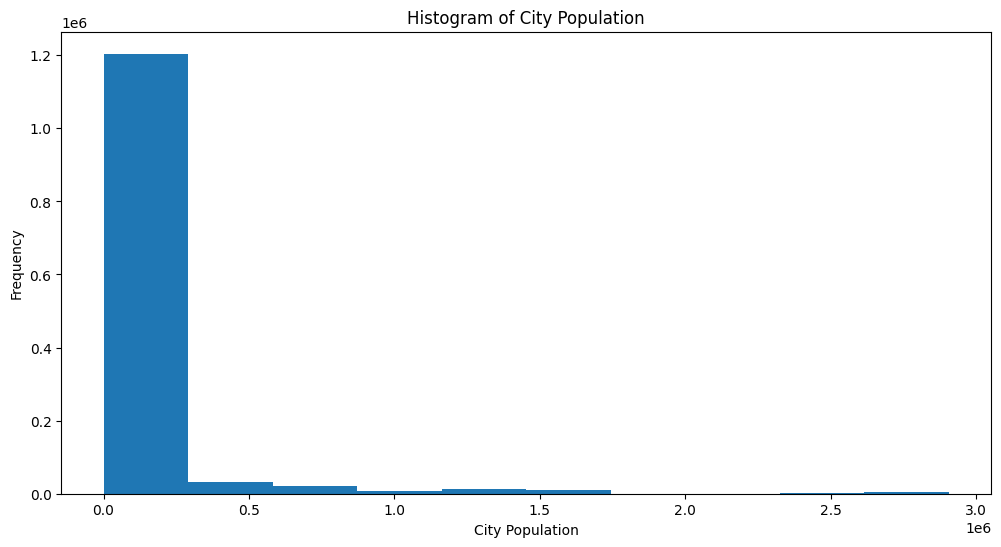

In [203]:
df['city_pop'].plot(kind='hist', title='Histogram of City Population', xlabel='City Population', ylabel='Frequency', figsize=(12, 6))

In [204]:
# How many unique values does each column have?
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
merch_zipcode              28336
year_of_trans                  2
dtype: int64

---

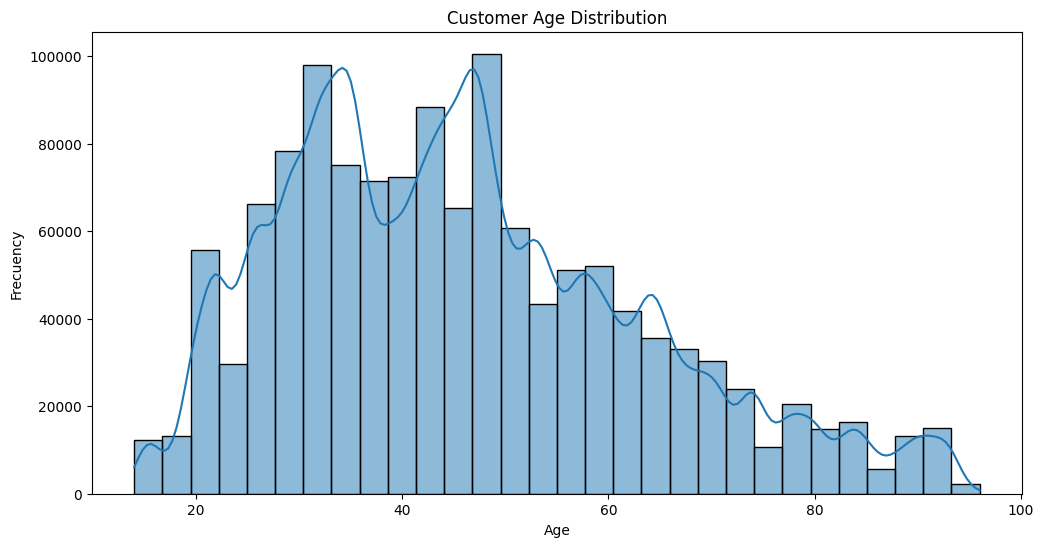

In [208]:
# How old are the customers?
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Calculate age
df['client_age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(df['client_age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frecuency')
plt.show()


---

#### **Results**:

1. The dataset has 1.2M records and 24 columns.
2. We have 1 candidate column to be the ID (`Unnamed: 0`).
3. We have 4 relevant categorical columns (`category`,`gender`,`state`,`job`,`is_fraud`).
4. We have 2 relevant numerical columns (`cc_num`, `amt`).
5. We have 2 relevant date columns (`trans_date_trans_time`, `dob`)

---